In [53]:
import numpy as np
import matplotlib.pyplot as plt

$$f(x_1, x_2) = (x_1 - 3)^2 + (x_2 - 1)^2$$

In [54]:
def f1(x, **kwargs):
    x1, x2 = x
    return (x1 - 3)**2 + (x2 - 1)**2

def grad_f1(x, **kwargs):
    x1, x2 = x
    g_x1 = 2 * (x1-3)
    g_x2 = 2 * (x2-1)
    return np.array([g_x1, g_x2])

$$f(x_1, x_2) = 10(x_1 − 1)^2 + (x_2 − 2)^2$$

In [55]:
def f2(x, **kwargs):
    x1, x2 = x
    return 10*(x1 - 1)**2 + (x2 - 2)**2

def grad_f2(x, **kwargs):
    x1, x2 = x
    g_x1 = 20*(x1-1)
    g_x2 = 2*(x2-2)
    return np.array([g_x1, g_x2])

$$f(x) = \frac{1}{2}|| Ax - b ||_2^2$$

In [56]:
def f3(x, **kwargs):

    A, b = compute_params(**kwargs)
    return 0.5 * np.linalg.norm(A@x - b, 2)**2

def grad_f3(x, **kwargs):
    
    A, b = compute_params(**kwargs)
    return A.T @ (A @ x - b)

def compute_params(**kwargs): 
    n = kwargs['n']
    v = np.linspace(0,1,n)

    A = np.vander(v, increasing=True)

    x_star = np.ones_like(v)
    b = A @ x_star

    return A, b

$$f(x) = \frac{1}{2} || Ax - b ||_2^2 + \frac{\lambda}{2} ||x||_2^2$$

In [57]:
def f4(x, **kwargs):

    lamb = kwargs['lamb']
    A, b = compute_params(**kwargs)
    return 0.5 * np.linalg.norm(A@x - b, 2)**2 + 0.5 * lamb * np.linalg.norm(x,2)**2

def grad_f4(x, **kwargs):
    
    lamb = kwargs['lamb']
    A, b = compute_params(**kwargs)
    return A.T @ (A@x - b) + lamb * x

$$f(x) = x^4 + x^3 - 2x^2 - 2x.$$

In [58]:
def f5(x, **kwargs):
    return x**4 + x**3 - 2*x**2 - 2*x

def grad_f5(x, **kwargs):
    return 4*x**3 + 3*x**2 - 4*x - 2

In [59]:
def GD(f, grad_f, x0, alpha, maxit=100, tolf=1e-5, tolx=1e-5, **kwargs):

    f_vals = np.zeros((maxit+1,))
    grad_norms = np.zeros((maxit+1,))

    #compute f and the gradient of f in x0
    f_vals[0] = f(x0, **kwargs)
    grad_norms[0] = np.linalg.norm(grad_f(x0, **kwargs))
    
    for iter in range(maxit): # loop over maxit

        next_x = x0 - alpha*grad_f(x0, **kwargs) # compute the next x

        # store values for plotting
        f_vals[iter+1] = f(next_x, **kwargs)
        grad_norms[iter+1] = np.linalg.norm(grad_f(next_x, **kwargs))

        #check stopping conditions
        if (np.linalg.norm(grad_f(next_x, **kwargs))<(tolf*np.linalg.norm(x0))) or (np.linalg.norm(next_x-x0)<tolx):
            break

        x0 = next_x # update current x

    # truncate not used part of the array
    f_vals = f_vals[:iter+1] 
    grad_norms = grad_norms[:iter+1]

    return x0, iter, f_vals, grad_norms

In [67]:
alpha_vals = np.linspace(0.1, 0.005, 10)   
results = []
n=10 

for alpha in alpha_vals:
    sol1 = GD(f1, grad_f1,x0=np.array([0,0]).reshape(-1,1), alpha=alpha)

    sol2 = GD(f2, grad_f2,x0=np.array([0,0]).reshape(-1,1), alpha=alpha)

    sol3 = GD(f3, grad_f3,x0=np.zeros((n)).reshape(-1,1), alpha=alpha, n=n)

    sol4 = GD(f4, grad_f4,x0=np.zeros((n)).reshape(-1,1), alpha=alpha, n=10, lamb=0.5)

    sol5 = GD(f5, grad_f5,x0=0, alpha=alpha)

    results.append([sol1,sol2,sol3,sol4,sol5]) # shape (10, 5). On the rows we have the values of alpha, on the columns the 5 function


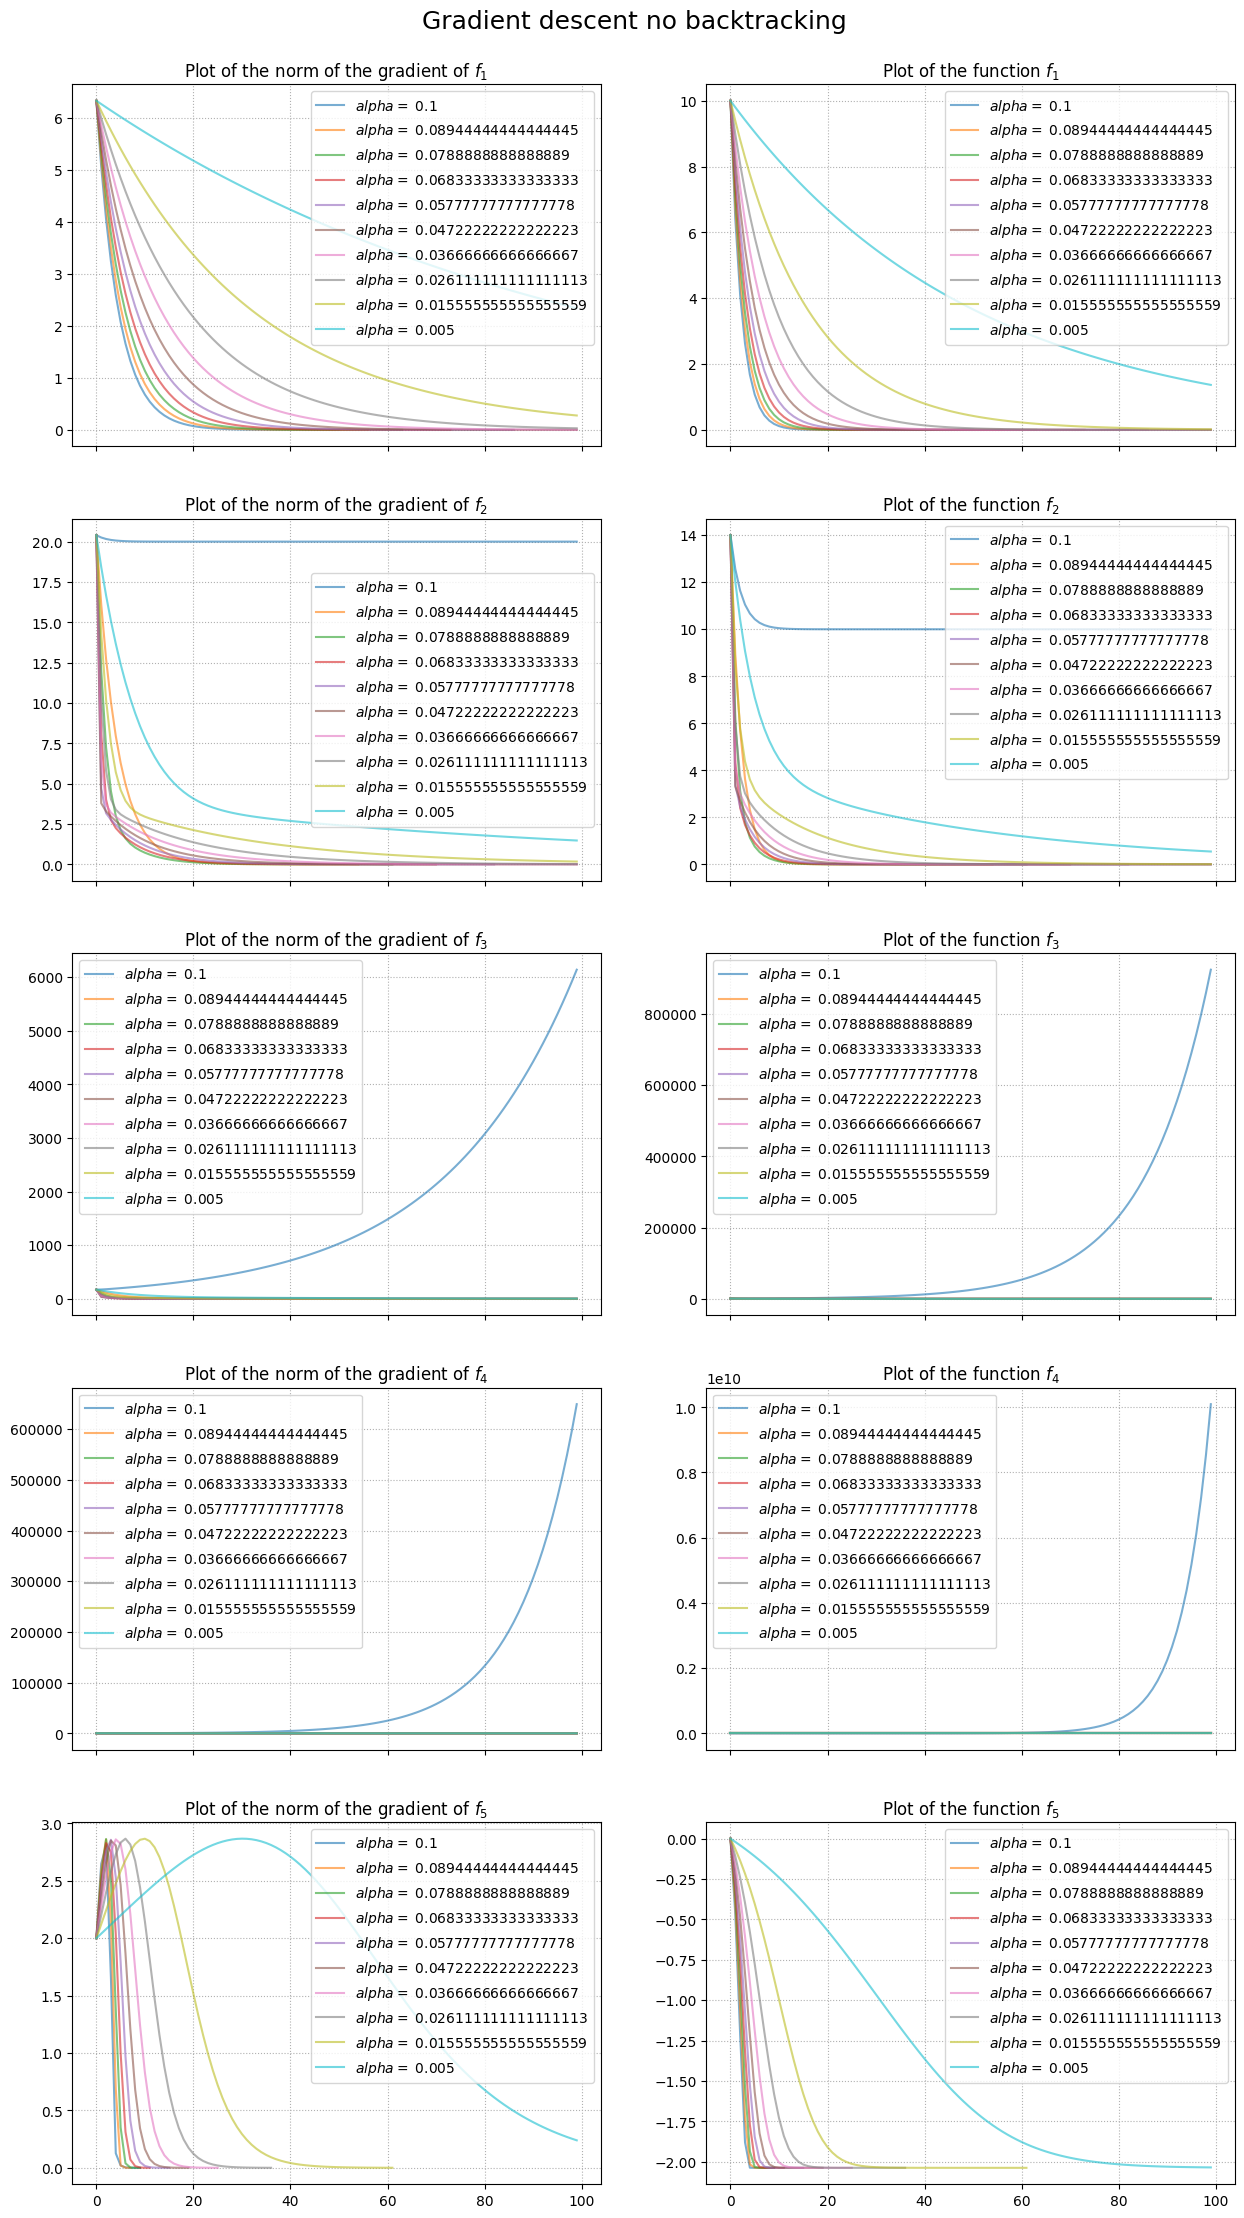

In [68]:
fig, axs = plt.subplots(figsize=(15,25), ncols=2, nrows=5, sharex=True)
fig.suptitle('Gradient descent no backtracking', size=18)
fig.subplots_adjust(top=0.95)

for i in range(5): #iterate over the functions

    fun_res = [row[i] for row in results] # array with 10 elements, contains the results obtained for the i-th function for each value of alpha

    for j in range(len(fun_res)): # iterate, for each function, over the results obtained with different values of alpha
        
        x_sol, k, f_vals, grad_norms = fun_res[j] #unpack the result otained for the i-th function with the j-th value of alpha

        # plot the norm of the gradient on the left
        ax = axs[i][0]
        ax.plot(range(k+1), grad_norms, label=f'$alpha = $ {alpha_vals[j]}', alpha=0.6) # plot the norm of the gradient w.r.t iterations
        ax.legend()
        ax.grid(linestyle=':')
        ax.set_title(f'Plot of the norm of the gradient of $f_{i+1}$')

        # plot the function on the right
        ax = axs[i][1]
        ax.plot(range(k+1), f_vals, label=f'$alpha = $ {alpha_vals[j]}', alpha=0.6) # plot the value of the function w.r.t iterations
        ax.legend()
        ax.grid(linestyle=':')
        ax.set_title(f'Plot of the function $f_{i+1}$')


As we can see from this plot, in general, higher is alpha, faster is the convergence. However, when $\alpha$ becomes too high ($\alpha = 0.1$ for example), the algorithm doesn't converge. This means that the step size is too long escaping from local minima. This happens for the functions $f_2, f_3$ and $f_4$. If we remove from the plot of $f_3$ and $f_4$ the line associated with $\alpha=0.1$ we obtain a plot similar to those of $f_1$ and $f_5$.

In [69]:
def backtracking(f, grad_f, x, **kwargs):
    """
    This function is a simple implementation of the backtracking algorithm for
    the GD (Gradient Descent) method.
    
    f: function. The function that we want to optimize.
    grad_f: function. The gradient of f(x).
    x: ndarray. The actual iterate x_k.
    """
    alpha = 1
    c = 0.8
    tau = 0.25
    
    while f(x - alpha * grad_f(x, **kwargs), **kwargs) > f(x, **kwargs) - c * alpha * np.linalg.norm(grad_f(x, **kwargs), 2) ** 2:
        alpha = tau * alpha
    return alpha


def GD_backtracking(f, grad_f, x0, maxit=100, tolf=1e-5, tolx=1e-5, **kwargs):

    f_vals = np.zeros((maxit+1,))
    grad_norms = np.zeros((maxit+1,))

    f_vals[0] = f(x0, **kwargs)
    grad_norms[0] = np.linalg.norm(grad_f(x0, **kwargs))
    
    for iter in range(maxit):

        alpha = backtracking(f, grad_f, x0, **kwargs)
        next_x = x0 - alpha*grad_f(x0, **kwargs)

        f_vals[iter+1] = f(next_x, **kwargs)
        grad_norms[iter+1] = np.linalg.norm(grad_f(next_x, **kwargs))

        #check stopping conditions
        if (np.linalg.norm(grad_f(next_x, **kwargs))<(tolf*np.linalg.norm(x0))) or (np.linalg.norm(next_x-x0)<tolx):
                break

        x0 = next_x

    f_vals = f_vals[:iter+1]
    grad_norms = grad_norms[:iter+1]

    return x0, iter, f_vals, grad_norms

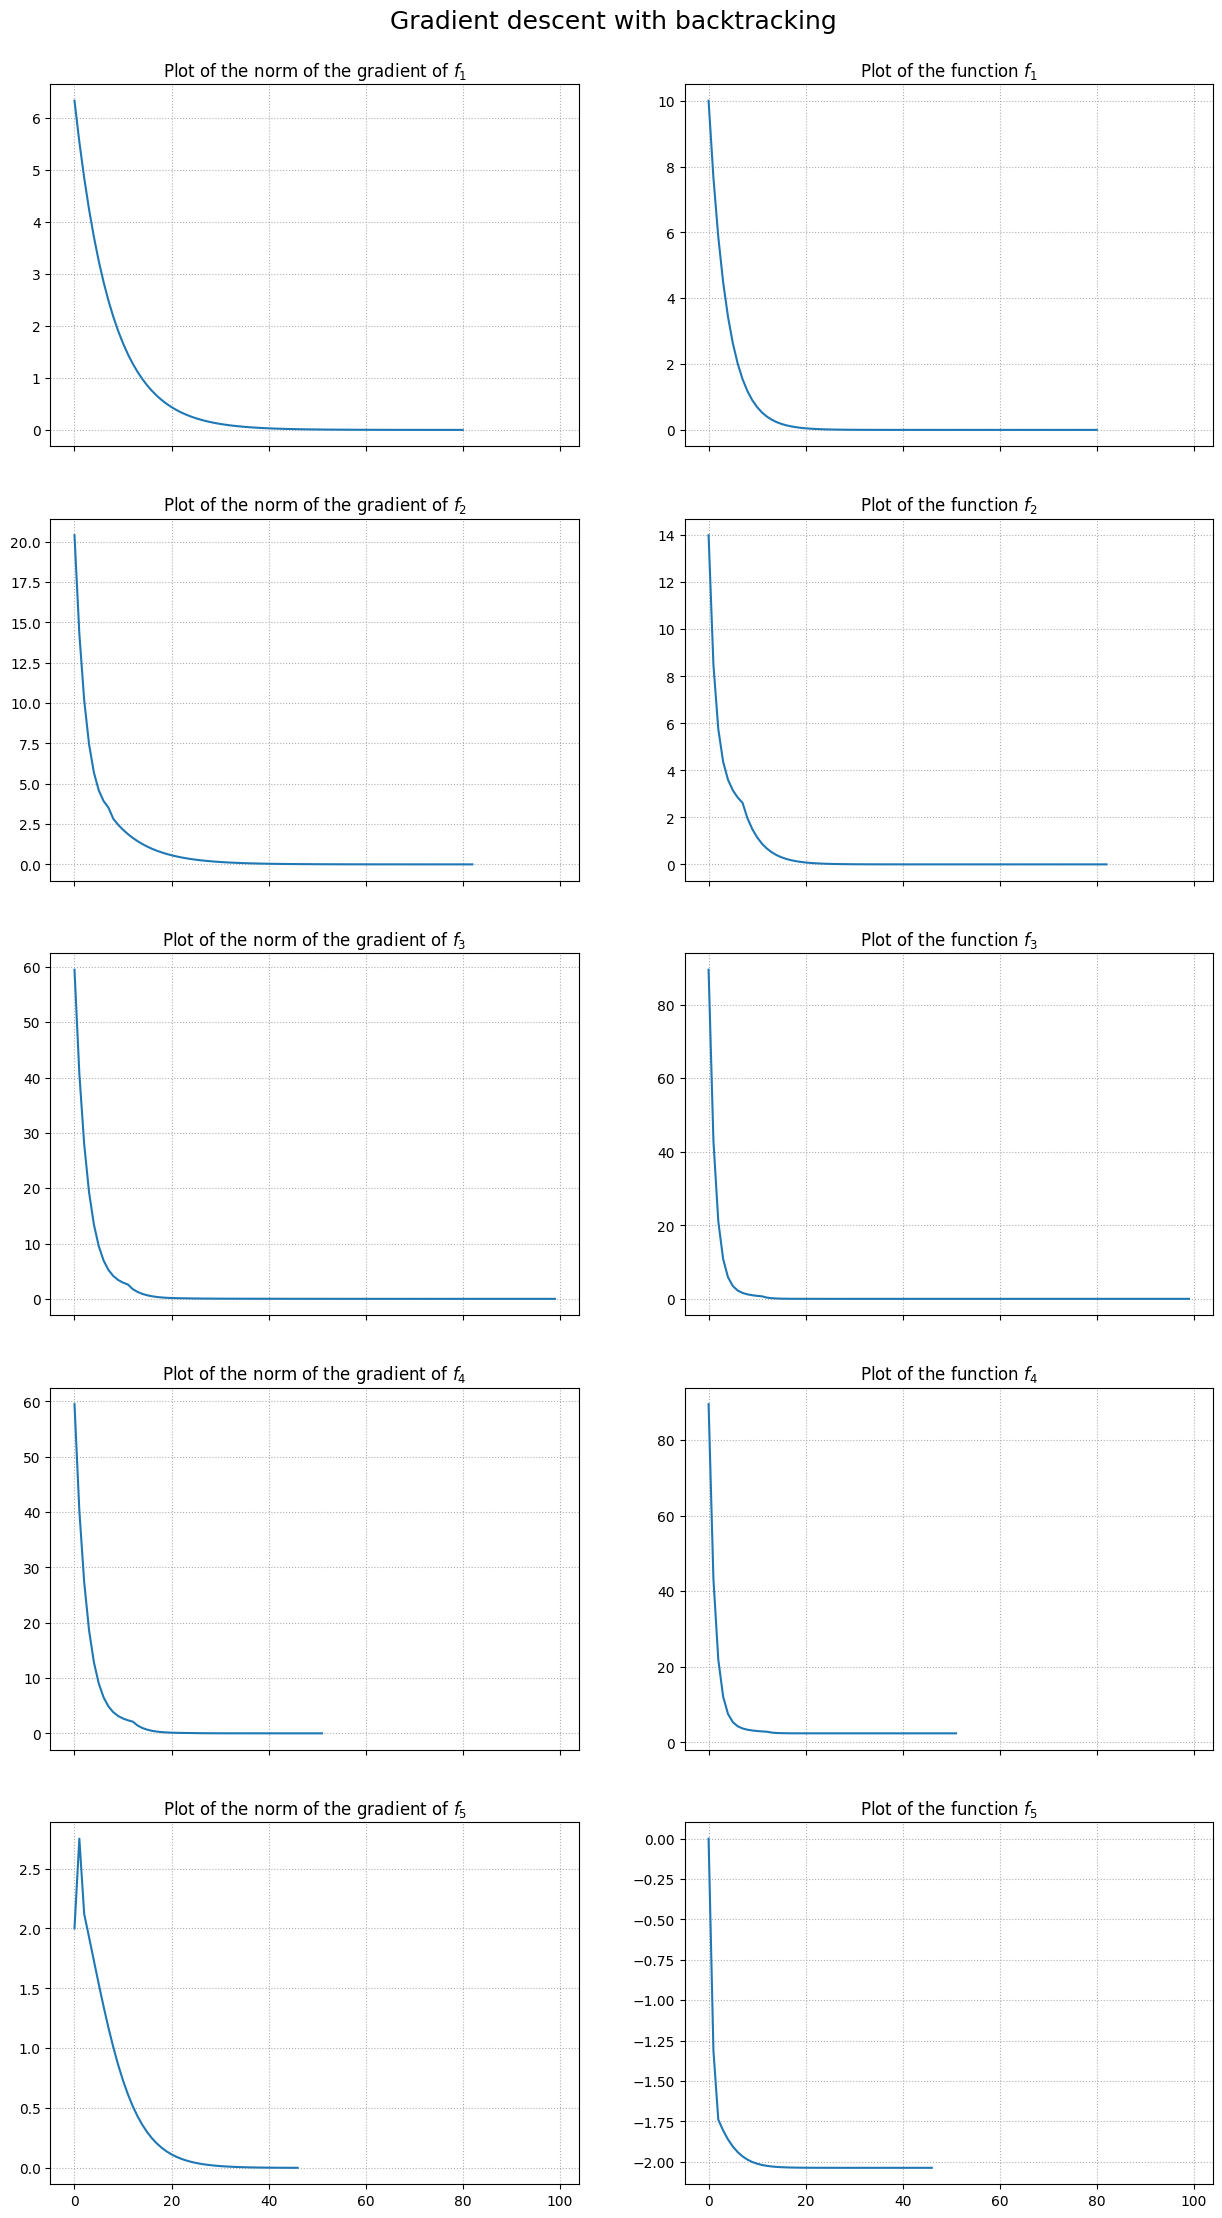

In [64]:
results = []

x_sol = GD_backtracking(f1, grad_f1,x0=np.zeros(2))
results.append(x_sol)
x_sol = GD_backtracking(f2, grad_f2,x0=np.zeros(2))
results.append(x_sol)
x_sol = GD_backtracking(f3, grad_f3,x0=np.zeros(n), n=10)
results.append(x_sol)
x_sol = GD_backtracking(f4, grad_f4,x0=np.zeros(n), n=10, lamb=0.5)
results.append(x_sol)
x_sol = GD_backtracking(f5, grad_f5,x0=np.array([0]))
results.append(x_sol)

fig, axs = plt.subplots(figsize=(15,25), ncols=2, nrows=5, sharex=True)
fig.suptitle('Gradient descent with backtracking', size=18)
fig.subplots_adjust(top=0.95)

for i in range(5): #iterate over the functions

    x_sol, k, f_vals, grad_norms = results[i]
    

    # plot the norm of the gradient on the left
    ax = axs[i][0]
    ax.plot(range(k+1), grad_norms) # plot the norm of the gradient w.r.t iterations
    ax.grid(linestyle=':')
    ax.set_title(f'Plot of the norm of the gradient of $f_{i+1}$')

    # plot the function on the right
    ax = axs[i][1]
    ax.plot(range(k+1), f_vals) # plot the value of the function w.r.t iterations
    ax.grid(linestyle=':')
    ax.set_title(f'Plot of the function $f_{i+1}$')


Looking at the plots of gradient descent with and without backtracking we can notice that GD with backtracking sometimes converges before sometimes converges after if compared with the best value of $\alpha$ of GD without backtracking. This is a reasonable behavior since backtracking algorthm chooses a good value of $\alpha$ but it is not guaranteed that the chosen value is the best.

* Try $f_3$ for different values of $n$ (e.g. $n = 5,10,15, \dots$).

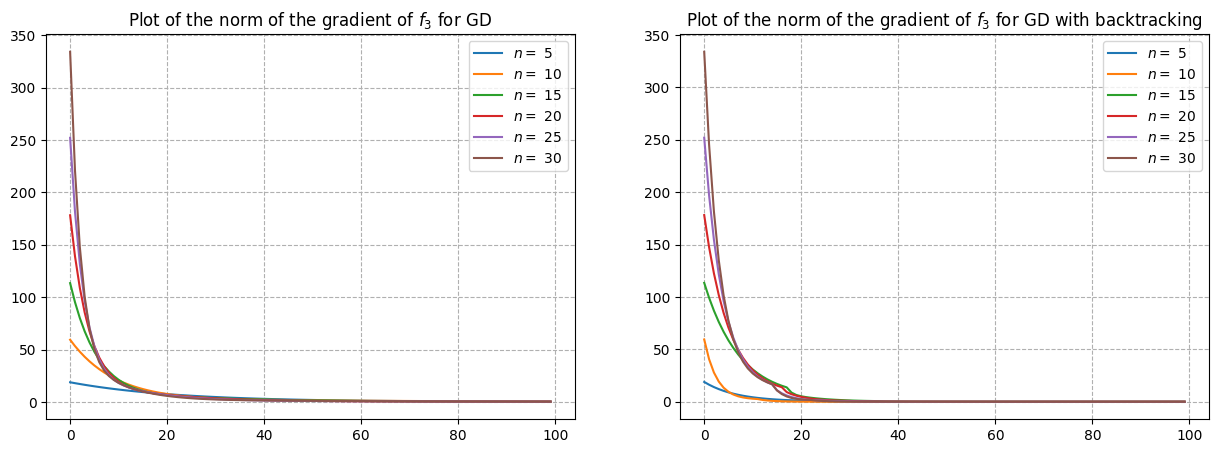

In [81]:
#GD and GD_backtracking for different values of n for f3
n_vals = [5,10, 15, 20, 25,30]
alpha = 0.005

results = []
for n in n_vals:
    res_gd = GD(f3, grad_f3,x0=np.zeros((n)), alpha=alpha, n=n)

    res_gdb = GD_backtracking(f3, grad_f3,x0=np.zeros((n)), n=n)

    results.append([res_gd, res_gdb])

fig, axs = plt.subplots(figsize=(15,5), nrows=1, ncols=2)
gd_results = [row[0] for row in results]
gdb_results = [row[1] for row in results]
for gd, gdb, i in zip(gd_results, gdb_results, np.arange(n)):

    x_sol_gd, k_gd, f_vals_gd, grad_norms_gd = gd
    x_sol_gdb, k_gdb, f_vals_gdb, grad_norms_gdb = gdb

    ax = axs[0]
    ax.plot(range(k_gd+1), grad_norms_gd, label=f'$n = $ {n_vals[i]}')
    ax.grid(visible=True, linestyle='--')
    ax.legend()
    ax.set_title(f'Plot of the norm of the gradient of $f_3$ for GD')


    ax = axs[1]
    ax.plot(range(k_gdb+1), grad_norms_gdb, label=f'$n = $ {n_vals[i]}')
    ax.grid(visible=True, linestyle='--')
    ax.set_title(f'Plot of the norm of the gradient of $f_3$ for GD with backtracking')
    ax.legend()
    

The convergence is a little bit higher for small values of $n$ but the genaral behavior is the same, regardless the value of $n$

* Try $f_4$ for different values of $\lambda$ and comment the result.

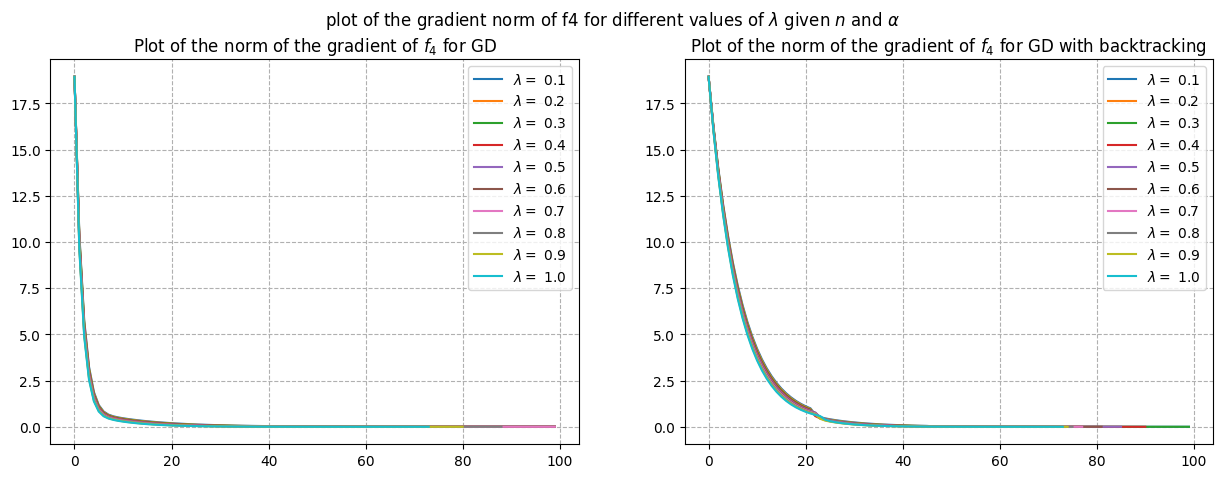

In [82]:
#plot of the gradient norm of f4 for different values of lambda given n and alpha
lambda_vals = np.linspace(0.1, 1, 10)
alpha = 0.05
n = 5

results = []
for lamb in lambda_vals:
    res_gd = GD(f4, grad_f4,x0=np.zeros((n)), alpha=alpha, n=n, lamb=lamb)

    res_gdb = GD_backtracking(f4, grad_f4,x0=np.zeros((n)), n=n, lamb=lamb)

    results.append([res_gd, res_gdb])

fig, axs = plt.subplots(figsize=(15,5), nrows=1, ncols=2)
gd_results = [row[0] for row in results]
gdb_results = [row[1] for row in results]
for i in range(len(lambda_vals)):

    x_sol_gd, k_gd, f_vals_gd, grad_norms_gd = gd_results[i]
    x_sol_gdb, k_gdb, f_vals_gdb, grad_norms_gdb = gdb_results[i]

    ax = axs[0]
    ax.plot(range(k_gd+1), grad_norms_gd, label=f'$\lambda = $ {lambda_vals[i]:.1f}')
    ax.grid(visible=True, linestyle='--')
    ax.legend()
    ax.set_title(f'Plot of the norm of the gradient of $f_4$ for GD')


    ax = axs[1]
    ax.plot(range(k_gdb+1), grad_norms_gdb, label=f'$\lambda = $ {lambda_vals[i]:.1f}')
    ax.grid(visible=True, linestyle='--')
    ax.legend()
    ax.set_title(f'Plot of the norm of the gradient of $f_4$ for GD with backtracking')

As we can see from the plot, higher values $\lambda$ result in a faster convergence.

* Plot the graph of the non-convex function 5 in the interval $[−3,3]$, and test the convergence of GD with different values of `x0` (of your choice) and different step-sizes. When is the convergence point the global minimum?

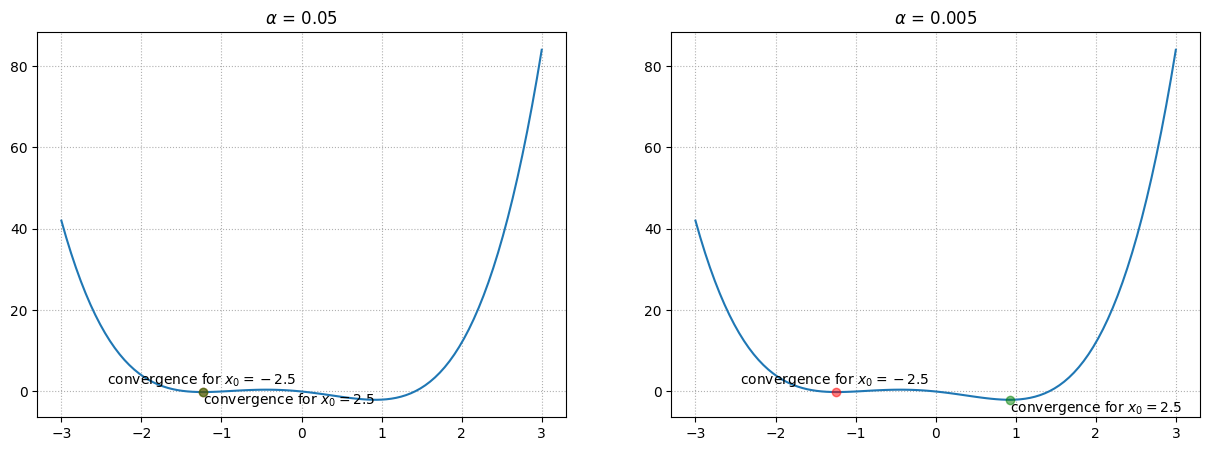

In [85]:
import matplotlib.pyplot as plt

alpha_vals = np.array([0.05, 0.005])
x = np.linspace(-3,3,100)
fig, axs = plt.subplots(figsize=(15, 5), nrows=1, ncols=2)


for i in range(len(alpha_vals)):
    ax = axs[i]
    ax.plot(x, f5(x))
    ax.grid(linestyle=':')

    sol1 = GD(f5, grad_f5,x0=-2.5, alpha=alpha_vals[i])
    sol2 = GD(f5, grad_f5,x0=2.5, alpha=alpha_vals[i])

    ax.plot(sol1[0], f5(sol1[0]), marker='o', color='r', alpha=0.5)
    ax.text(sol1[0]-1.2, f5(sol1[0])+2, 'convergence for $x_0=-2.5$')
    ax.plot(sol2[0], f5(sol2[0]), marker='o', color='green', alpha=0.5)
    ax.text(sol2[0], f5(sol2[0])-3, 'convergence for $x_0=2.5$')

    ax.set_title(f'$\\alpha$ = {alpha_vals[i]}')

plt.show()

As we can see, with an higher value of $\alpha$ the GD with $x_0=2.5$ escapes from the global minimum. This is not true for $\alpha=0.005$. This means that $\alpha=0.05$ is too big and the global minimum is not detected.